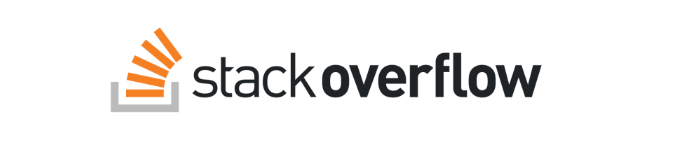

# Compréhension des données

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tag.util import untag

from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import gc
from langdetect import detect
import re
from bs4 import BeautifulSoup

In [2]:
# Download the required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("QueryResults_explored.csv")
print(df.shape)

(50000, 4)


In [4]:
df.head()

,Title,Body,Tags,Texte_clean
0,multilingual android sdk documentation,social responsibility project aim encourage yo...,<android><documentation><translation><javadoc>...,multilingual android sdk documentation social ...
1,use animation coco,try develop roulette game iphone animation spi...,<iphone><objective-c><cocoa-touch><animation><...,use animation coco try develop roulette game i...
2,extract original content xml sign file,deal xml signature know three type xml signatu...,<java><xml><digital-signature><xml-signature><...,extract original content xml sign file deal xm...
3,gotchas deploy cassandra cluster set linode vp...,learn apache cassandra database sic anyone goo...,<database><nosql><cassandra><vps><linode>,gotchas deploy cassandra cluster set linode vp...
4,swing change cursor wait cursor,see also java swing gui hour glass however pro...,<java><swing><jframe><event-dispatch-thread><m...,swing change cursor wait cursor see also java ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        49999 non-null  object
 1   Body         50000 non-null  object
 2   Tags         50000 non-null  object
 3   Texte_clean  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [6]:
df.nunique()

Title          49987
Body           50000
Tags           49082
Texte_clean    50000
dtype: int64

In [7]:
# copy
data = df.copy()

## Tags

In [8]:
# remplacer tous les caractères dans la colonne "Tags"
tokenizer = nltk.RegexpTokenizer(r'[<>]', gaps=True)
data['Tags_clean'] = data['Tags'].map(tokenizer.tokenize)

In [9]:
data['Tags_clean'][0]

['android', 'documentation', 'translation', 'javadoc', 'multilingual']

In [10]:
data

,Title,Body,Tags,Texte_clean,Tags_clean
0,multilingual android sdk documentation,social responsibility project aim encourage yo...,<android><documentation><translation><javadoc>...,multilingual android sdk documentation social ...,"[android, documentation, translation, javadoc,..."
1,use animation coco,try develop roulette game iphone animation spi...,<iphone><objective-c><cocoa-touch><animation><...,use animation coco try develop roulette game i...,"[iphone, objective-c, cocoa-touch, animation, ..."
2,extract original content xml sign file,deal xml signature know three type xml signatu...,<java><xml><digital-signature><xml-signature><...,extract original content xml sign file deal xm...,"[java, xml, digital-signature, xml-signature, ..."
3,gotchas deploy cassandra cluster set linode vp...,learn apache cassandra database sic anyone goo...,<database><nosql><cassandra><vps><linode>,gotchas deploy cassandra cluster set linode vp...,"[database, nosql, cassandra, vps, linode]"
4,swing change cursor wait cursor,see also java swing gui hour glass however pro...,<java><swing><jframe><event-dispatch-thread><m...,swing change cursor wait cursor see also java ...,"[java, swing, jframe, event-dispatch-thread, m..."
...,...,...,...,...,...
49995,javascript variable color jetbrains webstorm,j variable different color jetbrains webstorm ...,<javascript><node.js><intellij-idea><webstorm>...,javascript variable color jetbrains webstorm j...,"[javascript, node.js, intellij-idea, webstorm,..."
49996,load embed resource rtf file richtextbox load c,ok read load embed rtf rich text box try form ...,<c#-4.0><resources><richtextbox><rtf><embedded...,load embed resource rtf file richtextbox load ...,"[c#-4.0, resources, richtextbox, rtf, embedded..."
49997,new date wrong time zone,time post current time z new date give z hour ...,<javascript><node.js><datetime><timezone><isod...,new date wrong time zone time post current tim...,"[javascript, node.js, datetime, timezone, isod..."
49998,android test class fail compile eclipse bound ...,write testcases android app extend activityins...,<java><android><eclipse><unit-testing><generics>,android test class fail compile eclipse bound ...,"[java, android, eclipse, unit-testing, generics]"


In [11]:
def gotAnyTags(x, tags):
    return any(elem in x for elem in tags)

def gotAllTags(x, tags):
    return all(elem in x for elem in tags)

def getSubsetForAnyTags(tags):
    return data[data['Tags_clean'].apply(lambda x : gotAnyTags(x, tags))]

def getSubsetForAllTags(tags):
    return data[data['Tags_clean'].apply(lambda x : gotAllTags(x, tags))]

## Drop Feature prétraitement

In [12]:
data.drop(['Title', 'Body','Tags'], axis=1, inplace=True)

## Doublons

In [13]:
data

,Texte_clean,Tags_clean
0,multilingual android sdk documentation social ...,"[android, documentation, translation, javadoc,..."
1,use animation coco try develop roulette game i...,"[iphone, objective-c, cocoa-touch, animation, ..."
2,extract original content xml sign file deal xm...,"[java, xml, digital-signature, xml-signature, ..."
3,gotchas deploy cassandra cluster set linode vp...,"[database, nosql, cassandra, vps, linode]"
4,swing change cursor wait cursor see also java ...,"[java, swing, jframe, event-dispatch-thread, m..."
...,...,...
49995,javascript variable color jetbrains webstorm j...,"[javascript, node.js, intellij-idea, webstorm,..."
49996,load embed resource rtf file richtextbox load ...,"[c#-4.0, resources, richtextbox, rtf, embedded..."
49997,new date wrong time zone time post current tim...,"[javascript, node.js, datetime, timezone, isod..."
49998,android test class fail compile eclipse bound ...,"[java, android, eclipse, unit-testing, generics]"


In [14]:
data.duplicated(subset='Texte_clean').sum()

0

# Exploration

In [15]:
from collections import Counter

## Tags

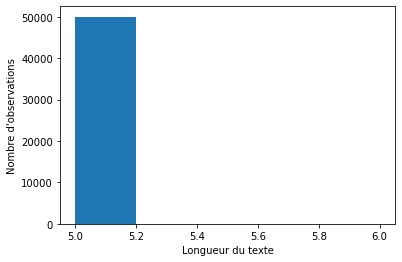

In [16]:
# Visualiser la distribution des longueurs de texte
text_lengths = data['Tags_clean'].str.len()
plt.hist(text_lengths, bins=5)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

### Outliers

In [17]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [18]:
dico_tags = liste_tags(data['Tags_clean'])

In [19]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [20]:
# Trier la feature par ordre décroissant
tags_df.sort_values(by='Quantity', ascending=False)

,Tags,Quantity
34,c#,6500
10,java,5773
71,python,4921
66,javascript,4875
105,c++,3899
...,...,...
12832,nsjsonserialization,1
1675,jbossws,1
1673,ndbunit,1
12828,list-separator,1


In [21]:
tags_df.describe()

,Quantity
count,18355.000000
mean,13.620430
std,112.527176
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,6500.000000


<AxesSubplot:xlabel='Quantity'>

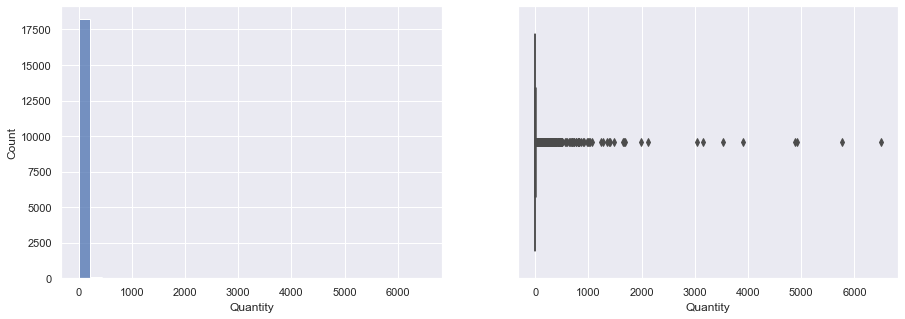

In [22]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(tags_df, x=var, bins=30, ax=ax1)
sns.boxplot(tags_df[var], ax=ax2)

Text(0, 0.5, 'Fréquence')

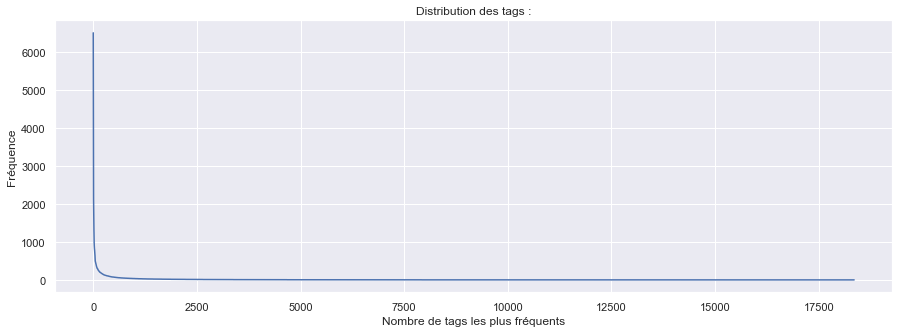

In [23]:
tags_counting_graph = tags_df.sort_values(['Quantity'], ascending=False)
plt.plot(tags_counting_graph['Quantity'].values)
plt.grid(True)
plt.title("Distribution des tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

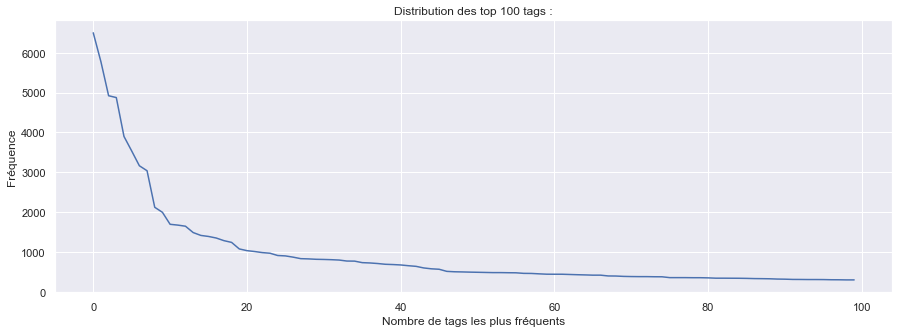

In [24]:
plt.plot(tags_counting_graph['Quantity'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

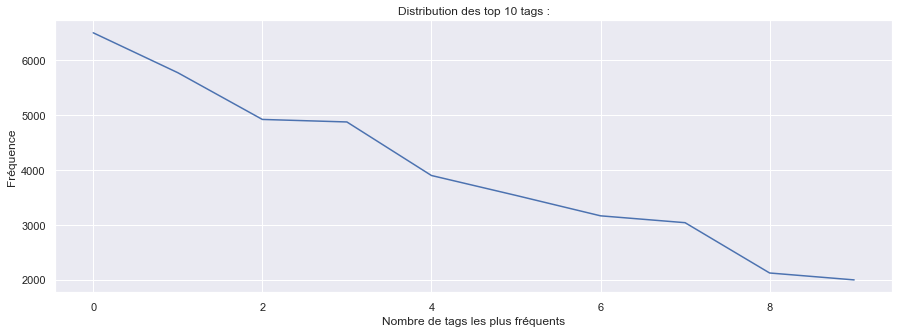

In [25]:
plt.plot(tags_counting_graph['Quantity'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

In [26]:
print("{} tags qui sont utilisés plus de 10 fois".format(tags_df[tags_df["Quantity"]>10].shape[0]))
print("{} tags qui sont utilisés plus de 25 fois".format(tags_df[tags_df["Quantity"]>25].shape[0]))
print("{} tags qui sont utilisés plus de 50 fois".format(tags_df[tags_df["Quantity"]>50].shape[0]))
print("{} tags qui sont utilisés plus de 100 fois".format(tags_df[tags_df["Quantity"]>100].shape[0]))
print("{} tags qui sont utilisés plus de 200 fois".format(tags_df[tags_df["Quantity"]>200].shape[0]))
print("{} tags qui sont utilisés plus de 500 fois".format(tags_df[tags_df["Quantity"]>500].shape[0]))

2873 tags qui sont utilisés plus de 10 fois
1344 tags qui sont utilisés plus de 25 fois
714 tags qui sont utilisés plus de 50 fois
367 tags qui sont utilisés plus de 100 fois
166 tags qui sont utilisés plus de 200 fois
48 tags qui sont utilisés plus de 500 fois


In [27]:
# Filtre des tags avec le plus de quantité
tags_df = tags_df[tags_df['Quantity'] >500]

In [28]:
tags_importante = tags_df['Tags'].tolist()

In [29]:
tags_importante

['android',
 'iphone',
 'objective-c',
 'java',
 'xml',
 'database',
 'ios',
 'macos',
 'angular',
 'c#',
 '.net',
 'linux',
 'asp.net',
 'reactjs',
 'windows',
 'ruby-on-rails',
 'ruby',
 'javascript',
 'jquery',
 'python',
 'python-3.x',
 'algorithm',
 'c++',
 'c',
 'php',
 'mysql',
 'sql',
 'performance',
 'wpf',
 'html',
 'css',
 'ajax',
 'arrays',
 'json',
 'visual-studio',
 'sql-server',
 'typescript',
 'unit-testing',
 'multithreading',
 'xcode',
 'django',
 'string',
 'asp.net-mvc',
 'node.js',
 'c++11',
 'spring',
 'pandas',
 'swift']

In [30]:
def filter_tags(tags):
    # filtre les tags en gardant uniquement ceux qui sont importants
    filtered_tags = [tag for tag in tags if tag in tags_importante]
    if len(filtered_tags) == 0:
        return np.nan
    else:
        # retourne une tuple contenant les tags filtrés et leur longueur
        return ' '.join(filtered_tags), len(filtered_tags)

In [31]:
# Application de la fonction
data[['Tags_filtered', 'Tags_filtered_len']] = data['Tags_clean'].apply(
    lambda x: filter_tags(x)).apply(pd.Series)

In [32]:
data

,Texte_clean,Tags_clean,Tags_filtered,Tags_filtered_len
0,multilingual android sdk documentation social ...,"[android, documentation, translation, javadoc,...",android,1.0
1,use animation coco try develop roulette game i...,"[iphone, objective-c, cocoa-touch, animation, ...",iphone objective-c,2.0
2,extract original content xml sign file deal xm...,"[java, xml, digital-signature, xml-signature, ...",java xml,2.0
3,gotchas deploy cassandra cluster set linode vp...,"[database, nosql, cassandra, vps, linode]",database,1.0
4,swing change cursor wait cursor see also java ...,"[java, swing, jframe, event-dispatch-thread, m...",java,1.0
...,...,...,...,...
49995,javascript variable color jetbrains webstorm j...,"[javascript, node.js, intellij-idea, webstorm,...",javascript node.js,2.0
49996,load embed resource rtf file richtextbox load ...,"[c#-4.0, resources, richtextbox, rtf, embedded...",NaN,NaN
49997,new date wrong time zone time post current tim...,"[javascript, node.js, datetime, timezone, isod...",javascript node.js,2.0
49998,android test class fail compile eclipse bound ...,"[java, android, eclipse, unit-testing, generics]",java android unit-testing,3.0


In [33]:
data = data.dropna(subset=['Tags_filtered'])

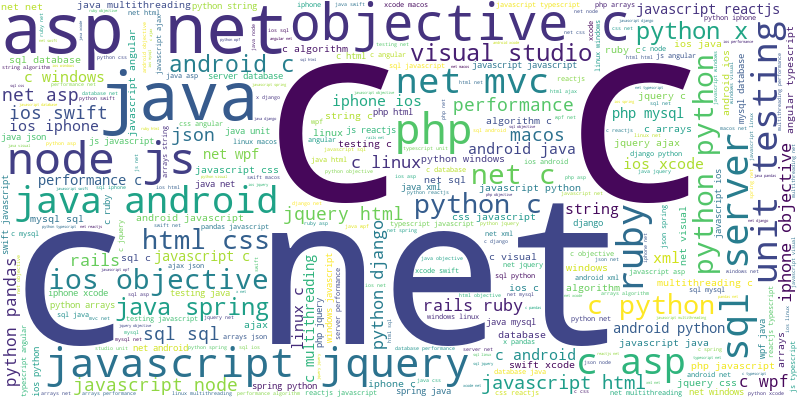

In [34]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['Tags_filtered'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Drop features Tags

In [35]:
data.drop(['Tags_clean'], axis=1, inplace=True)

In [36]:
data

,Texte_clean,Tags_filtered,Tags_filtered_len
0,multilingual android sdk documentation social ...,android,1.0
1,use animation coco try develop roulette game i...,iphone objective-c,2.0
2,extract original content xml sign file deal xm...,java xml,2.0
3,gotchas deploy cassandra cluster set linode vp...,database,1.0
4,swing change cursor wait cursor see also java ...,java,1.0
...,...,...,...
49994,convert json fee nsdictionary json category da...,ios objective-c,2.0
49995,javascript variable color jetbrains webstorm j...,javascript node.js,2.0
49997,new date wrong time zone time post current tim...,javascript node.js,2.0
49998,android test class fail compile eclipse bound ...,java android unit-testing,3.0


## Texte

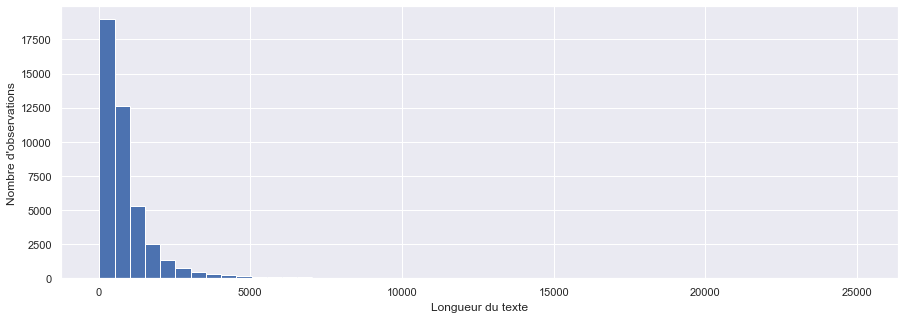

In [37]:
# Visualiser la distribution des longueurs de texte
text_lengths = data['Texte_clean'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

### Outliers

In [38]:
data['Text_split'] = data.apply(lambda r :r['Texte_clean'].split(), axis=1)
filtered_text = data['Text_split'].to_list()

In [39]:
def build_word_distribution(corpus):
    from nltk import FreqDist
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Words', 'Frequency'])
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)
    return word_dist_df

words_df = build_word_distribution(filtered_text)
print(f"Nombre de tokens du corpus {words_df.shape[0]}")
print("Affichage des 60 tokens les plus utilisés")
display(words_df.head(60))

Nombre de tokens du corpus 169946
Affichage des 60 tokens les plus utilisés


,Words,Frequency
71,use,66764
124,get,36978
106,file,35695
447,class,35068
82,java,33405
658,c,33345
640,x,32071
241,code,28308
185,new,28288
689,name,27790


<AxesSubplot:xlabel='Frequency'>

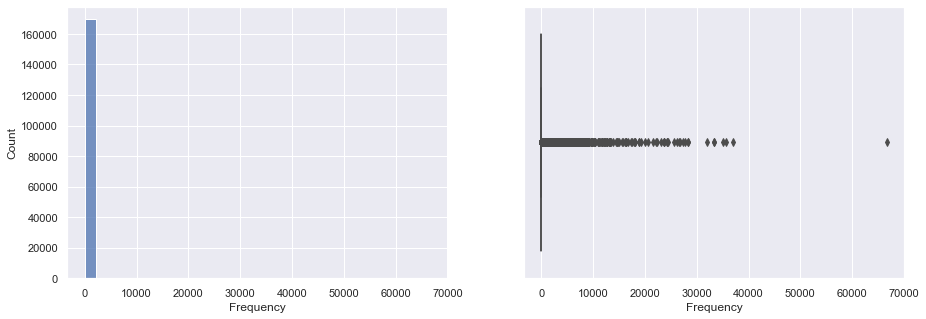

In [40]:
var = 'Frequency'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(words_df, x=var, bins=30, ax=ax1)
sns.boxplot(words_df[var], ax=ax2)

Text(0, 0.5, 'Fréquence')

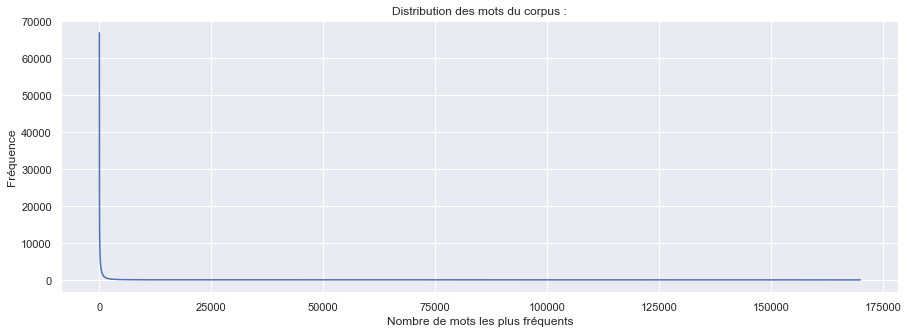

In [41]:
words_counting_graph = words_df.sort_values(['Frequency'], ascending=False)
plt.plot(words_counting_graph['Frequency'].values)
plt.grid(True)
plt.title("Distribution des mots du corpus :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

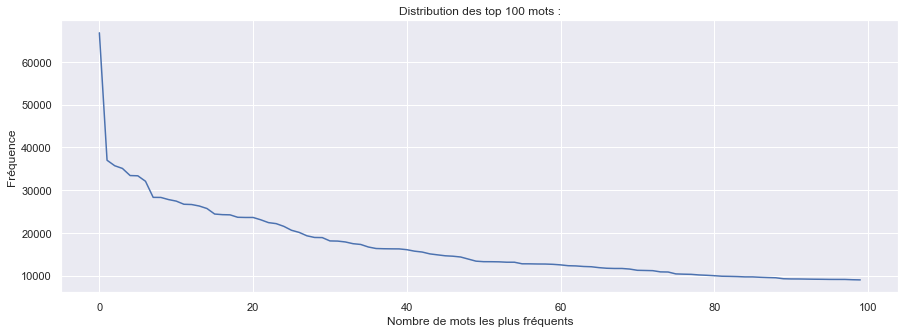

In [42]:
plt.plot(words_counting_graph['Frequency'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 mots :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

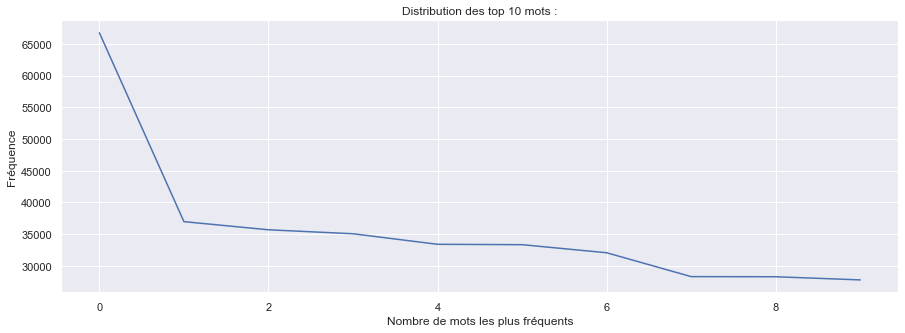

In [43]:
plt.plot(words_counting_graph['Frequency'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 mots :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

In [44]:
print("{} mots qui sont utilisés plus de 10 fois".format(words_df[words_df['Frequency']>10].shape[0]))
print("{} mots qui sont utilisés plus de 25 fois".format(words_df[words_df['Frequency']>25].shape[0]))
print("{} mots qui sont utilisés plus de 50 fois".format(words_df[words_df['Frequency']>50].shape[0]))
print("{} mots qui sont utilisés plus de 100 fois".format(words_df[words_df['Frequency']>100].shape[0]))
print("{} mots qui sont utilisés plus de 200 fois".format(words_df[words_df['Frequency']>200].shape[0]))
print("{} mots qui sont utilisés plus de 500 fois".format(words_df[words_df['Frequency']>500].shape[0]))
print("{} mots qui sont utilisés plus de 1000 fois".format(words_df[words_df['Frequency']>1000].shape[0]))
print("{} mots qui sont utilisés plus de 5000 fois".format(words_df[words_df['Frequency']>5000].shape[0]))
print("{} mots qui sont utilisés plus de 50000 fois".format(words_df[words_df['Frequency']>50000].shape[0]))

21272 mots qui sont utilisés plus de 10 fois
10863 mots qui sont utilisés plus de 25 fois
6812 mots qui sont utilisés plus de 50 fois
4413 mots qui sont utilisés plus de 100 fois
2847 mots qui sont utilisés plus de 200 fois
1591 mots qui sont utilisés plus de 500 fois
964 mots qui sont utilisés plus de 1000 fois
223 mots qui sont utilisés plus de 5000 fois
1 mots qui sont utilisés plus de 50000 fois


### Dictionnaire d'exception

In [45]:
# Filtre des mots avec le plus de quantité + garder les tags importante
words_df = words_df[(words_df['Words'].isin(tags_importante)) | (words_df['Frequency'] > 5000)]

In [46]:
words_importante = words_df['Words'].tolist()

In [47]:
words_importante

['use',
 'get',
 'file',
 'class',
 'java',
 'c',
 'x',
 'code',
 'new',
 'name',
 'error',
 'data',
 'return',
 'string',
 'work',
 'like',
 'android',
 'id',
 'user',
 'try',
 'public',
 'value',
 'test',
 'type',
 'function',
 'app',
 'org',
 'run',
 'com',
 'int',
 'set',
 'http',
 'e',
 'create',
 'would',
 'object',
 'method',
 'way',
 'find',
 'want',
 'add',
 'one',
 'call',
 'application',
 'b',
 'time',
 'need',
 'import',
 'system',
 'version',
 'server',
 'make',
 'true',
 'self',
 'follow',
 'var',
 'problem',
 'image',
 'text',
 'f',
 'j',
 'void',
 'list',
 'python',
 'view',
 'build',
 'project',
 'request',
 'line',
 'example',
 'result',
 'know',
 'v',
 'log',
 'web',
 'n',
 'net',
 'null',
 'also',
 'div',
 'change',
 'model',
 'question',
 'look',
 'key',
 'see',
 'main',
 'start',
 'array',
 'table',
 'html',
 'item',
 'service',
 'include',
 'module',
 'lib',
 'size',
 'write',
 'r',
 'page',
 'seem',
 'update',
 'private',
 'path',
 'p',
 'message',
 'something',

In [48]:
def filter_words(words):
    filtered_words = list(filter(lambda w: w in words_importante, words))
    if len(filtered_words) == 0:
        return np.nan
    else:
        # retourne les words filtrés et leur longueur
        return ' '.join(filtered_words), len(filtered_words)

In [49]:
# Application de la fonction
data[['Words_filtered', 'Words_filtered_len']] = data['Text_split'].apply(
    lambda x: filter_words(x)).apply(pd.Series)

In [50]:
data

,Texte_clean,Tags_filtered,Tags_filtered_len,Text_split,Words_filtered,Words_filtered_len
0,multilingual android sdk documentation social ...,android,1.0,"[multilingual, android, sdk, documentation, so...",android project application main problem able ...,46.0
1,use animation coco try develop roulette game i...,iphone objective-c,2.0,"[use, animation, coco, try, develop, roulette,...",use try iphone,3.0
2,extract original content xml sign file deal xm...,java xml,2.0,"[extract, original, content, xml, sign, file, ...",content xml file xml know type xml use java ap...,35.0
3,gotchas deploy cassandra cluster set linode vp...,database,1.0,"[gotchas, deploy, cassandra, cluster, set, lin...",set apache database like think would way web s...,48.0
4,swing change cursor wait cursor see also java ...,java,1.0,"[swing, change, cursor, wait, cursor, see, als...",change see also java however seem work follow ...,28.0
...,...,...,...,...,...,...
49994,convert json fee nsdictionary json category da...,ios objective-c,2.0,"[convert, json, fee, nsdictionary, json, categ...",json json data url string url return code want...,44.0
49995,javascript variable color jetbrains webstorm j...,javascript node.js,2.0,"[javascript, variable, color, jetbrains, webst...",javascript color j different color path use co...,11.0
49997,new date wrong time zone time post current tim...,javascript node.js,2.0,"[new, date, wrong, time, zone, time, post, cur...",new date time time post time new date give way...,30.0
49998,android test class fail compile eclipse bound ...,java android unit-testing,3.0,"[android, test, class, fail, compile, eclipse,...",android test class fail compile error write an...,36.0


In [51]:
data.isna().sum()

Texte_clean           0
Tags_filtered         0
Tags_filtered_len     0
Text_split            0
Words_filtered        8
Words_filtered_len    8
dtype: int64

In [52]:
data = data.dropna(subset=['Words_filtered'])

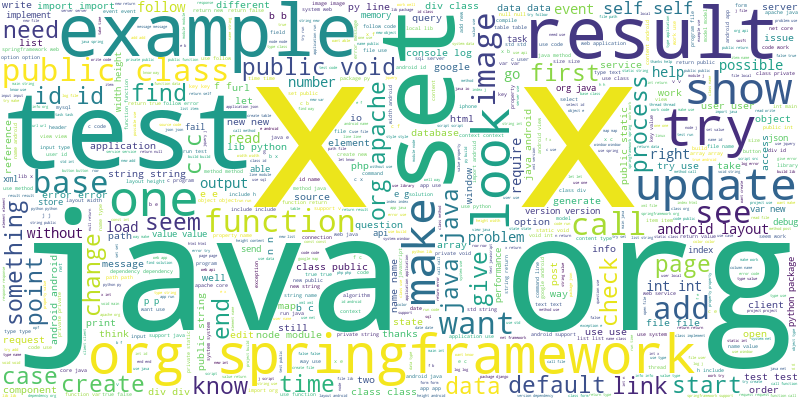

In [53]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['Words_filtered'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Drop features words

In [54]:
data.drop(['Texte_clean','Text_split'], axis=1, inplace=True)

In [55]:
data

,Tags_filtered,Tags_filtered_len,Words_filtered,Words_filtered_len
0,android,1.0,android project application main problem able ...,46.0
1,iphone objective-c,2.0,use try iphone,3.0
2,java xml,2.0,content xml file xml know type xml use java ap...,35.0
3,database,1.0,set apache database like think would way web s...,48.0
4,java,1.0,change see also java however seem work follow ...,28.0
...,...,...,...,...
49994,ios objective-c,2.0,json json data url string url return code want...,44.0
49995,javascript node.js,2.0,javascript color j different color path use co...,11.0
49997,javascript node.js,2.0,new date time time post time new date give way...,30.0
49998,java android unit-testing,3.0,android test class fail compile error write an...,36.0


# Features engineering

In [56]:
def len_fct(sentence) :
    return len(sentence)

In [57]:
data["Texte_len"] = data['Words_filtered'].apply(len_fct)
data["Texte_len"].head()

0    313
1     14
2    181
3    264
4    160
Name: Texte_len, dtype: int64

<AxesSubplot:xlabel='Texte_len'>

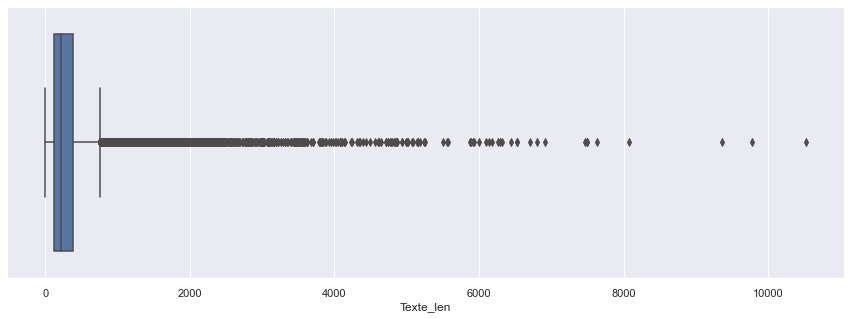

In [58]:
sns.boxplot(data["Texte_len"])

<AxesSubplot:xlabel='Texte_len', ylabel='Density'>

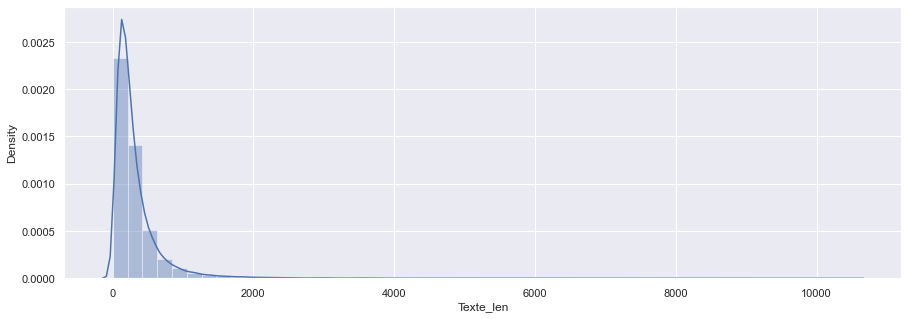

In [59]:
sns.distplot(data["Texte_len"])

In [60]:
data["Tags_len"] = data["Tags_filtered"].apply(len_fct)
data["Tags_len"].head()

0     7
1    18
2     8
3     8
4     4
Name: Tags_len, dtype: int64

<AxesSubplot:xlabel='Tags_len'>

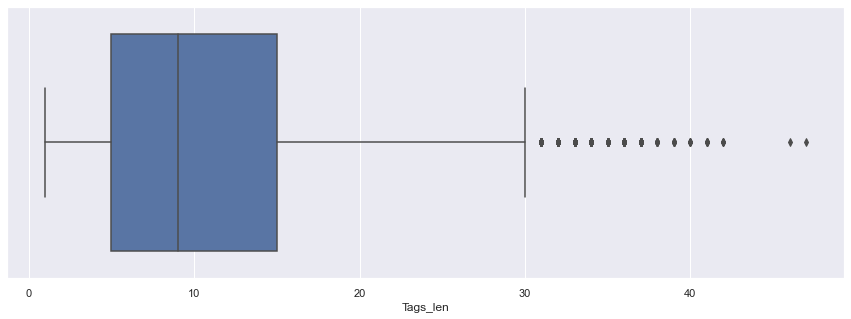

In [61]:
sns.boxplot(data["Tags_len"])

<AxesSubplot:xlabel='Texte_len', ylabel='Density'>

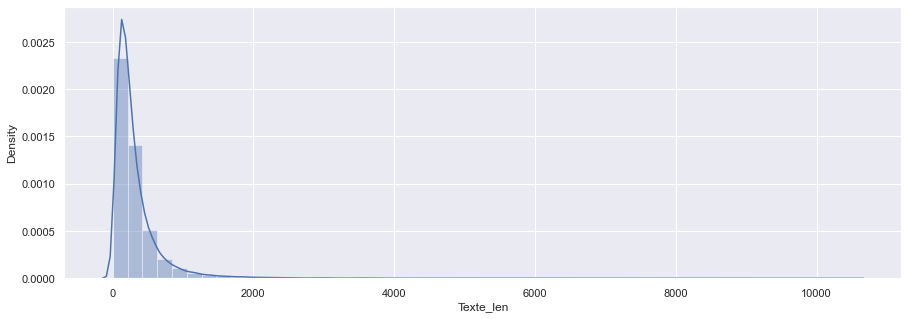

In [62]:
sns.distplot(data["Texte_len"])

In [63]:
data["Tags_len_ratio"] = round(data.apply(
    lambda r: (r["Texte_len"] / r["Tags_len"]), axis=1))
data["Tags_len_ratio"].head()

0    45.0
1     1.0
2    23.0
3    33.0
4    40.0
Name: Tags_len_ratio, dtype: float64

<AxesSubplot:xlabel='Tags_len_ratio'>

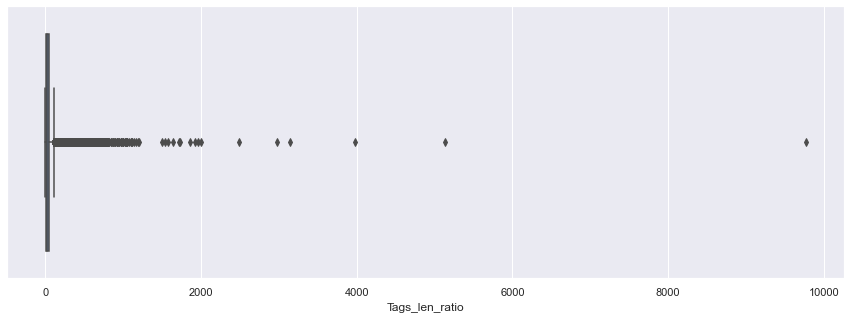

In [64]:
sns.boxplot(data["Tags_len_ratio"])

<AxesSubplot:xlabel='Texte_len', ylabel='Density'>

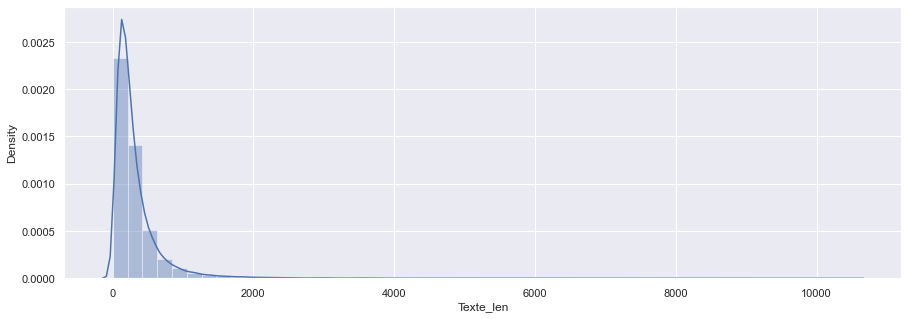

In [65]:
sns.distplot(data["Texte_len"])

# Analyses

## Missing values

<AxesSubplot:>

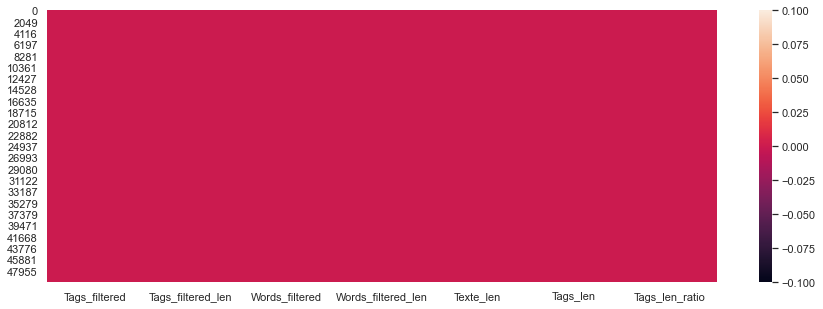

In [66]:
sns.heatmap(data.isna())

In [67]:
#les total de data pour chaque feature et le pourcentage de missing value
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Tags_filtered,0,0.0
Tags_filtered_len,0,0.0
Words_filtered,0,0.0
Words_filtered_len,0,0.0
Texte_len,0,0.0
Tags_len,0,0.0
Tags_len_ratio,0,0.0


## Distribution

In [68]:
data.describe(include = np.number)

,Tags_filtered_len,Words_filtered_len,Texte_len,Tags_len,Tags_len_ratio
count,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000
mean,1.736935,58.425984,325.031456,10.565340,50.457441
std,0.796610,73.813641,407.940868,6.900188,101.293980
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,22.000000,124.000000,5.000000,12.000000
50%,2.000000,39.000000,215.000000,9.000000,25.000000
75%,2.000000,68.000000,378.000000,15.000000,54.000000
max,5.000000,2241.000000,10522.000000,47.000000,9773.000000


In [69]:
cols = ['Texte_len','Tags_len','Tags_filtered_len','Words_filtered_len']

In [70]:
from scipy.stats import norm
import scipy.stats as st

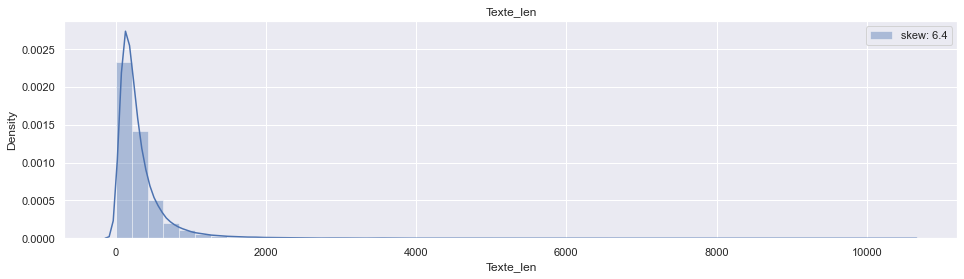

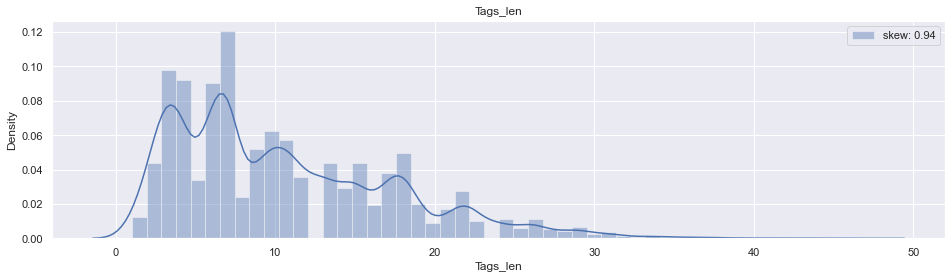

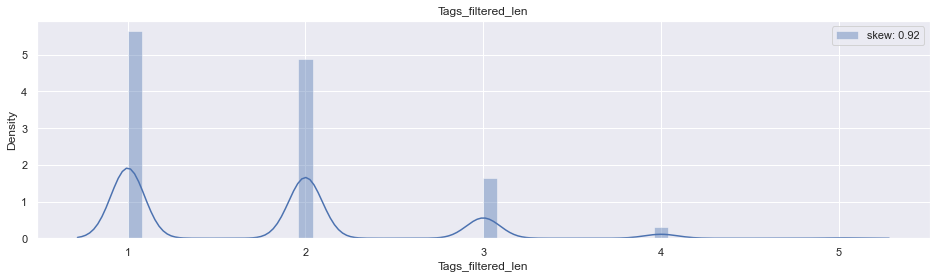

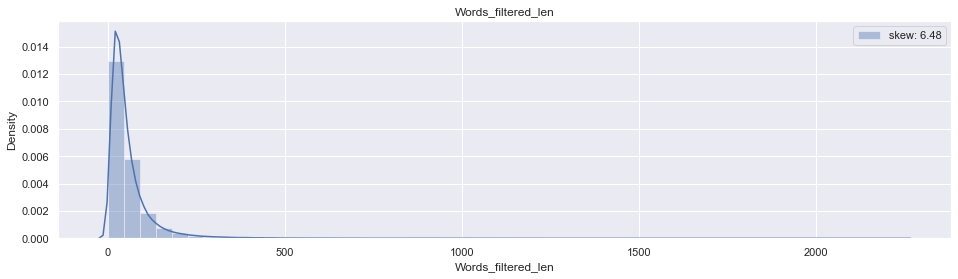

In [71]:
# réprésentation avec un displot 
for col in cols:
    plt.figure(figsize=(16, 4))
    sns.distplot(data[col], label="skew: "+str(np.round(data[col].skew(),2)))
    plt.title(col)
    plt.legend()

In [72]:
for col in cols:
        w, pvalue = st.shapiro(data[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution ne suit pas une loi normale")

Texte_len----------------------------------------- 0.5468283891677856 0.0
On rejette H0 : la distribution ne suit pas une loi normale
Tags_len------------------------------------------ 0.9225330352783203 0.0
On rejette H0 : la distribution ne suit pas une loi normale
Tags_filtered_len--------------------------------- 0.7903119325637817 0.0
On rejette H0 : la distribution ne suit pas une loi normale
Words_filtered_len-------------------------------- 0.5420867204666138 0.0
On rejette H0 : la distribution ne suit pas une loi normale


## Feature Scaling
Application d'une transformation logarithmique sur nos données numériques

In [73]:
df_transform = data.copy()

In [74]:
cols_to_scale = ['Texte_len','Tags_len','Tags_filtered_len','Words_filtered_len']

In [75]:
# apply log(x+1) element-wise to a subset of columns
df_transform = df_transform[cols_to_scale].applymap(lambda x: np.log(x+1))

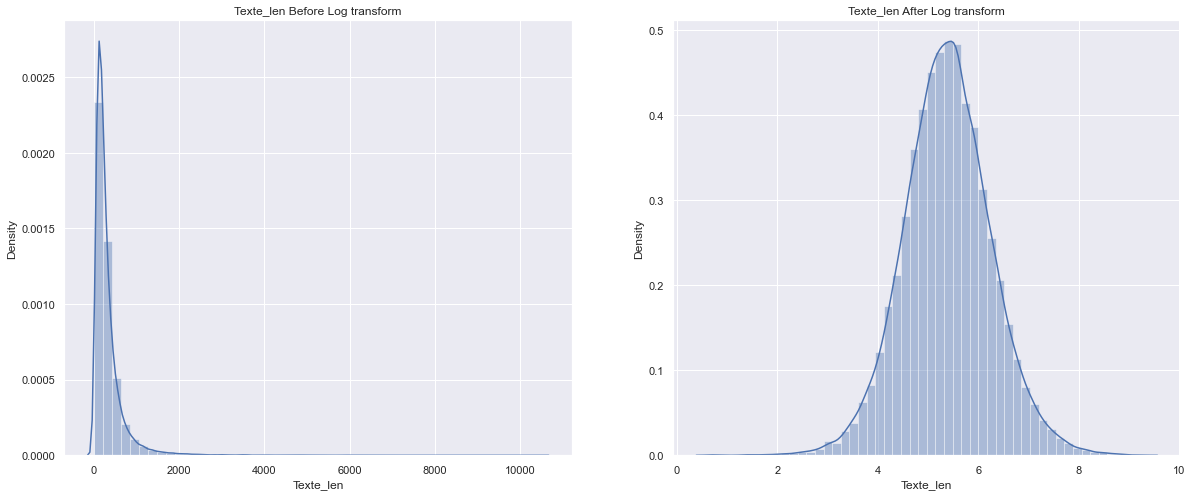

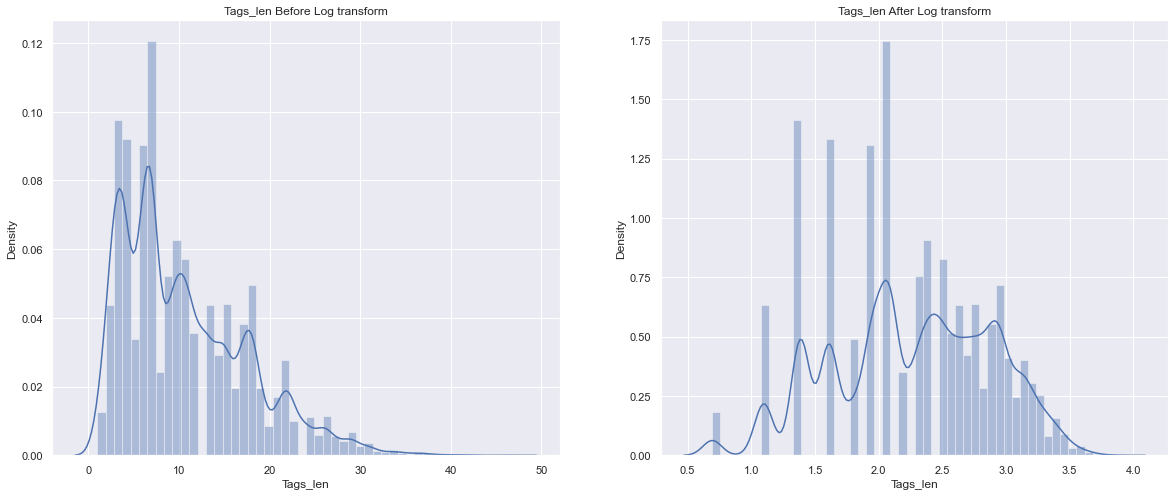

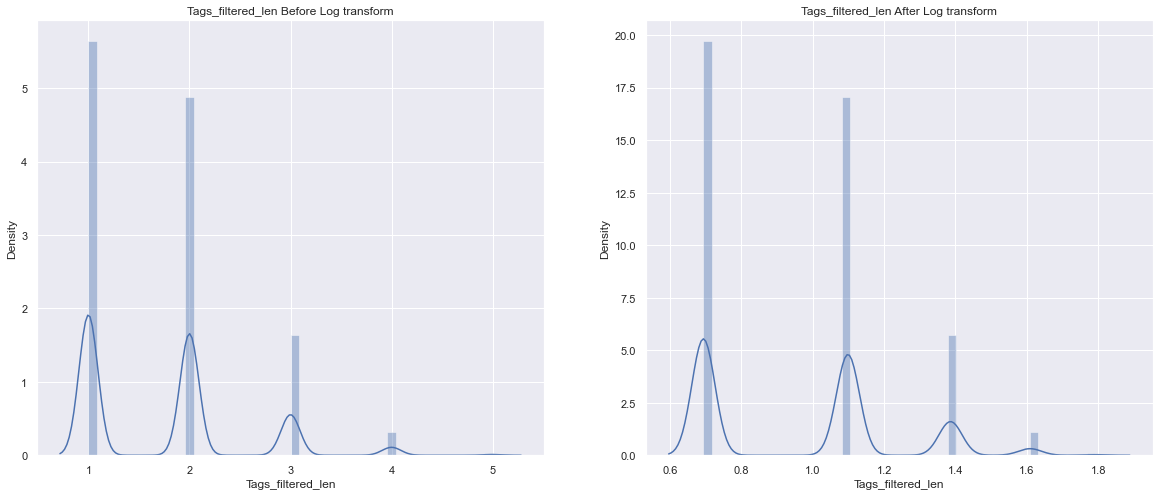

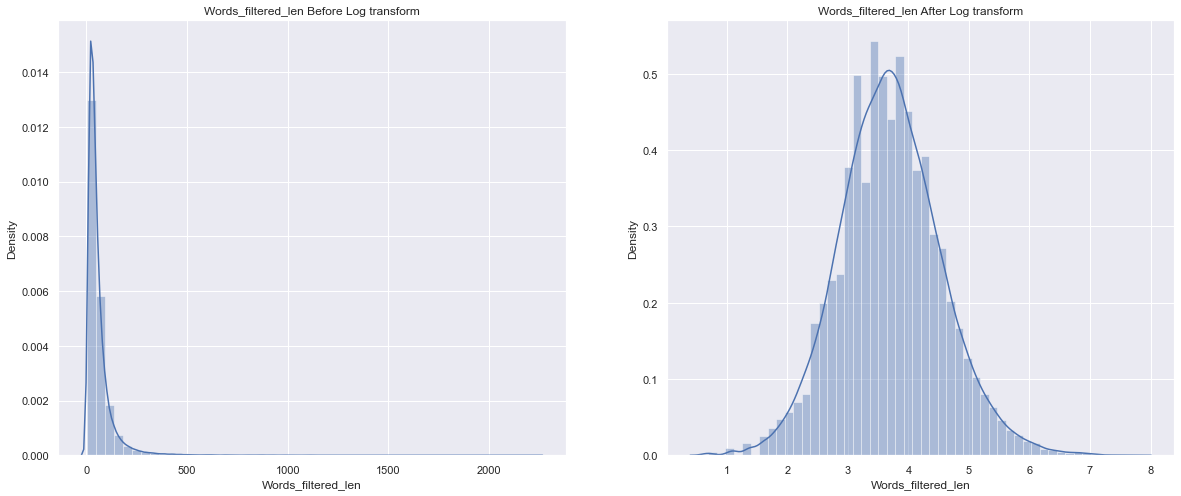

In [76]:
# Visualisation avant / Après log transform
for col1, col2 in zip(cols,cols_to_scale):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.distplot(data[col1], ax=axes[0], label="skew: "+str(np.round(data[col1].skew(),2)))
    axes[0].set_title(f'{col1} Before Log transform')
    sns.distplot(df_transform[col2], ax=axes[1], label="skew: "+str(np.round(df_transform[col2].skew(),2)))
    axes[1].set_title(f'{col2} After Log transform')
    plt.show()

# Analyse multivariée

## Analyse des corrélations

In [77]:
# Compute correlation coefficients
corr_matrix = data.corr()

In [78]:
# Print the correlation matrix
corr_matrix

,Tags_filtered_len,Words_filtered_len,Texte_len,Tags_len,Tags_len_ratio
Tags_filtered_len,1.000000,0.004522,0.004597,0.838227,-0.250230
Words_filtered_len,0.004522,1.000000,0.986116,0.018040,0.627271
Texte_len,0.004597,0.986116,1.000000,0.021243,0.612682
Tags_len,0.838227,0.018040,0.021243,1.000000,-0.297711
Tags_len_ratio,-0.250230,0.627271,0.612682,-0.297711,1.000000


<AxesSubplot:>

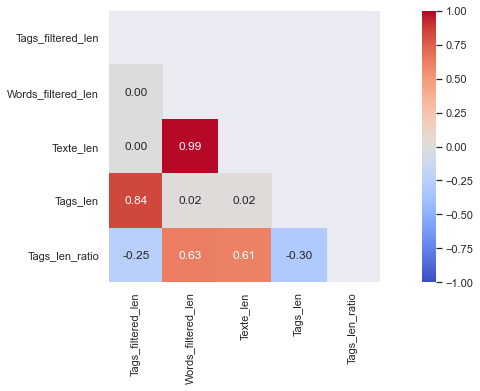

In [79]:
# Visualize the correlation matrix as a heatmap
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, cmap='coolwarm',
            annot=True, fmt=".2f", square=True)

In [ ]:
# pairplot
sns.pairplot(data)

# Conclusion exploration

In [ ]:
data.to_csv('QueryResults_MLsupervisee.csv', index=False, header=True)